<a href="https://colab.research.google.com/github/mintleaves/mintleaves/blob/main/Life_Expectancy_Predictor_Final!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life Expectancy Predictor

will you live forever?


no

#Introduction
In this project, we aim to predict average life expectancy of a country. We do this by examining key factors such as unemployment rates, undernourishment, and even public defecation (which we have data on for some reason). Now we classify the life expectancy for each country as either above or below average and use a naive bayes classifier and random forest to predict for each country if they're above or below average. In the end, our random forest is almost 98% accurate!

#0. Quick setup (we leave out a lot of the stuff we include in setup here just to make it easier to look at :)

In [ ]:
import pandas as pd
print(pd.__version__ == '1.1.5')
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

True


#1: Data Acquisition and cleaning

###1.1 Data Acquisition

Let's get the data! Our raw data contains countries, the particular indicator, and rates for different years.



In [ ]:
raw_data_df = pd.read_csv('/content/drive/MyDrive/jawns/data.csv', error_bad_lines=False)
raw_data_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,132.675635,131.665502,129.19098,126.736756,124.382809,122.133431,120.020186,118.087531,116.132988,114.100918,111.980005,109.783822,106.033489,102.341721,98.739002,95.241251,91.791192,88.001177,84.207256,80.359323,76.441596,72.51458,71.170664,69.888768,69.004413,67.755992,66.928451,64.948968,62.922778,60.707070,58.596631,56.440128,55.531540,54.658781,53.831410,52.901528,51.990793,51.522856,51.103250,50.732590,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89005,Zimbabwe,ZWE,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,17.300000,NaN,9.700000,NaN,NaN,26.800000,NaN,NaN
89006,Zimbabwe,ZWE,Use of Intermittent Preventive Treatment of ma...,SH.MLR.SPF2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.300000,NaN,NaN,13.900000,NaN,7.300000,NaN,NaN,12.900000,NaN,NaN
89007,Zimbabwe,ZWE,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,19.000000,20.000000,81.000000,67.000000,83.000000,0.000000,77.000000,49.000000,47.000000,61.000000,34.000000,32.000000,NaN,NaN
89008,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN


###1.2 Cleaning

As we can see above, the data is pretty irregular and has a ton of NaNs. A lot of the rows are very poorly filled out, so we did some cleaning to retain only those data points that had consistent data. We have many cool data points to pick from!


In [ ]:
print(len(raw_data_df['Country Name'].unique()))

258


Here, we have the columns we want to use and "indicators" in dataframe test_df.

In [ ]:
test_df = raw_data_df[(raw_data_df["Indicator Name"] == 'Incidence of HIV (% of uninfected population ages 15-49)') | 
                     (raw_data_df["Indicator Name"] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)') | 
                      (raw_data_df["Indicator Name"] == 'Life expectancy at birth, total (years)') |
                      (raw_data_df["Indicator Name"] == 'People practicing open defecation (% of population)') |
                      (raw_data_df["Indicator Name"] == 'Unemployment, total (% of total labor force)') |
                      (raw_data_df["Indicator Name"] == 'Out-of-pocket health expenditure (% of total expenditure on health)') |
                      (raw_data_df["Indicator Name"] == 'Prevalence of undernourishment (% of population)')
                      ] 

test_df = test_df[["Country Name", "Indicator Name","1990", "1991",
                   "1992", "1993", "1994", "1995", "1996", 
                   "1997", "1998", "1999", "2000", "2001", "2002", "2003",
                   "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012",
                   "2013", "2014"]]
test_df

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
2,Arab World,"Adolescent fertility rate (births per 1,000 wo...",69.004413,67.755992,66.928451,64.948968,62.922778,60.707070,58.596631,56.440128,55.531540,54.658781,53.831410,52.901528,51.990793,51.522856,51.103250,50.732590,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418
141,Arab World,Incidence of HIV (% of uninfected population a...,0.011707,0.012782,0.013467,0.014201,0.014873,0.015430,0.015813,0.015942,0.016840,0.016663,0.016081,0.015518,0.015189,0.016194,0.015688,0.015373,0.015325,0.014894,0.014889,0.014785,0.014858,0.014889,0.014785,0.014826,0.014870
148,Arab World,"Life expectancy at birth, total (years)",64.448776,64.796224,65.069810,65.400252,65.746108,66.145831,66.486739,66.817944,67.118190,67.403313,67.651435,67.884670,68.102625,68.313556,68.532723,68.753521,68.983189,69.207008,69.417183,69.618929,69.813025,69.993010,70.173670,70.369806,70.567902
205,Arab World,Out-of-pocket health expenditure (% of total e...,NaN,NaN,NaN,NaN,NaN,38.532813,38.180647,39.317588,40.958641,38.775874,36.562037,34.335166,35.829531,34.779540,34.726360,33.911574,33.420037,34.320562,34.362415,32.149489,33.099488,30.881954,30.908218,30.397234,30.074535
206,Arab World,People practicing open defecation (% of popula...,18.516570,16.813317,16.588354,17.187787,16.816236,16.356427,15.995365,15.605973,15.030795,14.565591,14.123628,13.680453,13.231686,12.773953,12.328537,11.862649,11.913188,11.383077,10.771226,10.279044,10.019772,9.667831,8.242927,7.000996,6.926876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88813,Zimbabwe,"Life expectancy at birth, total (years)",59.583073,58.197171,56.491976,54.538707,52.422122,50.239000,48.087634,46.065902,44.272585,42.791488,41.689439,40.996805,40.679146,40.702488,41.059341,41.759610,42.810707,44.177756,45.804488,47.624659,49.574659,51.600366,53.643073,55.633000,57.498317
88870,Zimbabwe,Out-of-pocket health expenditure (% of total e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.658360,26.156324,28.245493,28.151257,26.317528,32.954629,46.436180,50.527718,55.425394,45.999223,39.350479,39.069132,33.999542,34.231009,35.940635
88871,Zimbabwe,People practicing open defecation (% of popula...,33.200000,32.900000,32.400000,32.000000,31.700000,31.300000,31.000000,30.600000,30.300000,29.900000,29.600000,29.200000,28.900000,28.800000,28.700000,28.600000,28.500000,28.400000,28.300000,28.200000,28.100000,28.000000,27.900000,27.900000,27.700000
88955,Zimbabwe,Prevalence of undernourishment (% of population),NaN,42.700000,44.400000,45.100000,46.100000,46.300000,45.800000,44.700000,43.800000,43.600000,43.700000,43.700000,43.200000,42.800000,42.500000,41.600000,40.400000,38.600000,37.300000,36.000000,34.700000,33.500000,33.200000,33.500000,34.000000


### 1.3 The Real Cleaning
in test_df, the "indicator values" are really the features we'll want to consider during the machine learning part of this project. Now, the issue with that is that they're rows. Another problem is that we only have 258 countries/regions to consider. Because of this, we want to instead make the "indicator values" into columns and consider for each given year the values for each country. Then, to increase the number of rows, we can consider a large range of years and act as if each country in each year is a different country since the indicator variables change drastically every year

In [ ]:
def getIndicatorAtYear(indicator, year):
  temp_df = test_df[["Country Name", "Indicator Name", year]]
  temp_df = temp_df[temp_df["Indicator Name"] == indicator]
  temp_df["Country Name"] = temp_df["Country Name"].apply(lambda x: x+year)
  temp_df = temp_df[["Country Name", year]]
  temp_df = temp_df.rename(columns = {year : indicator})
  return temp_df


In [ ]:
def getAllIndicatorsInYear(year):
    temp_df = getIndicatorAtYear("Incidence of HIV (% of uninfected population ages 15-49)", year)
    for indicator in test_df["Indicator Name"].unique():
      # print(indicator)
      temp_df = pd.merge(temp_df, getIndicatorAtYear(indicator, year), how = "inner", on = "Country Name")
    return temp_df

Now, to get our cleaned dataframe, let's use those methods to make indicators columns and give each country a year and corresponding indicator for each year

In [ ]:
indicators_2000 = getAllIndicatorsInYear("2000")
indicators_2001 = getAllIndicatorsInYear("2001")
indicators_2002 = getAllIndicatorsInYear("2002")
indicators_2003 = getAllIndicatorsInYear("2003")
indicators_2004 = getAllIndicatorsInYear("2004")
indicators_2005 = getAllIndicatorsInYear("2005")
indicators_2006 = getAllIndicatorsInYear("2006")
indicators_2007 = getAllIndicatorsInYear("2007")
indicators_2008= getAllIndicatorsInYear("2008")
indicators_2009 = getAllIndicatorsInYear("2009")
indicators_2010 = getAllIndicatorsInYear("2010")
indicators_2011 = getAllIndicatorsInYear("2011")
indicators_2012 = getAllIndicatorsInYear("2012")
indicators_2013 = getAllIndicatorsInYear("2013")
indicators_2014 = getAllIndicatorsInYear("2014")
indicators_1999 = getAllIndicatorsInYear("1999")
indicators_1998 = getAllIndicatorsInYear("1998")
indicators_1997 = getAllIndicatorsInYear("1997")
indicators_1996 = getAllIndicatorsInYear("1996")
indicators_1995 = getAllIndicatorsInYear("1995")
indicators_1994 = getAllIndicatorsInYear("1994")
indicators_1993 = getAllIndicatorsInYear("1993")
indicators_1992 = getAllIndicatorsInYear("1992")
indicators_1991 = getAllIndicatorsInYear("1991")
indicators_1990 = getAllIndicatorsInYear("1990")
dataframes = [indicators_1999, indicators_1998, indicators_1997, indicators_1996, 
              indicators_1995, indicators_1994, indicators_1993, indicators_1992,
              indicators_1991, indicators_1990,
              indicators_2000, indicators_2001, indicators_2002, indicators_2003,
              indicators_2004, indicators_2005, indicators_2006, indicators_2007,
              indicators_2008, indicators_2009, indicators_2010, indicators_2011,
              indicators_2012, indicators_2013, indicators_2014]
cleaned_data = pd.concat(dataframes).drop(columns = ["Incidence of HIV (% of uninfected population ages 15-49)_x"])
cleaned_data = cleaned_data.drop(columns = ["Incidence of HIV (% of uninfected population ages 15-49)_y"])

cleaned_data

no_nulls = cleaned_data.dropna(axis = 0)
no_nulls

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Life expectancy at birth, total (years)",Out-of-pocket health expenditure (% of total expenditure on health),People practicing open defecation (% of population),Prevalence of undernourishment (% of population),"Unemployment, total (% of total labor force)"
0,Arab World1999,54.658781,67.403313,38.775874,14.565591,10.384208,12.560328
1,Caribbean small states1999,73.554782,70.080801,31.742794,1.911468,10.328210,13.683283
3,Early-demographic dividend1999,68.134338,64.128199,41.730719,40.193086,18.824411,6.202662
4,East Asia & Pacific1999,19.809457,71.016385,22.597362,8.335003,18.405973,4.834189
5,East Asia & Pacific (excluding high income)1999,21.039113,70.017763,52.314289,9.248108,18.757345,4.783419
...,...,...,...,...,...,...,...
249,Uzbekistan2014,17.817800,68.339024,43.932355,0.000000,5.000000,10.600000
251,"Venezuela, RB2014",79.667200,74.236195,64.333652,5.400000,5.000000,8.600000
252,Vietnam2014,38.119400,75.629122,36.758840,0.800000,11.800000,2.300000
256,Zambia2014,93.015600,60.047049,29.994881,14.300000,48.400000,13.300000


Here, we have our first correlation matrix for the cleaned data! 

Some fun things to note: life expectancy is negatively correlated with adolescent fertility rate, undernourishment, and public defecation, which kind of makes a lot of sense. But what's a little weirder to see is that public defecation is correlated with teenage pregnancies

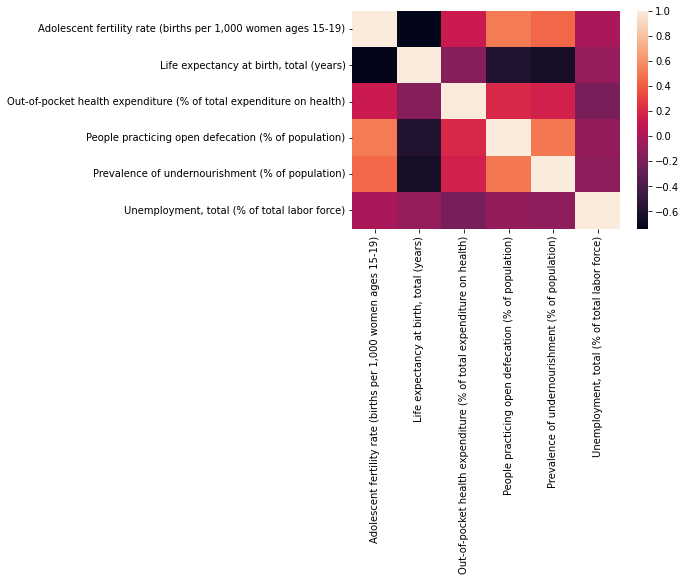

In [ ]:
ax = sns.heatmap(no_nulls.corr())

We then find the mean life expectancy among all the countries, and then assign 
a value of 1 if the country is abive average or 0 if it is below average to classify our data in 2 sets based off of life expectancy. Our goal will be to predict whether life expectancy is above or below average on the set of countries during different years

In [ ]:
mean_life_expectancy = no_nulls['Life expectancy at birth, total (years)'].mean()
print(mean_life_expectancy)

64.72707558965189


In [ ]:
pd.options.mode.chained_assignment = None
no_nulls['above_average'] = [1 if expect > mean_life_expectancy
                            else 0 for expect in no_nulls['Life expectancy at birth, total (years)']]
no_nulls

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Life expectancy at birth, total (years)",Out-of-pocket health expenditure (% of total expenditure on health),People practicing open defecation (% of population),Prevalence of undernourishment (% of population),"Unemployment, total (% of total labor force)",above_average
0,Arab World1999,54.658781,67.403313,38.775874,14.565591,10.384208,12.560328,1
1,Caribbean small states1999,73.554782,70.080801,31.742794,1.911468,10.328210,13.683283,1
3,Early-demographic dividend1999,68.134338,64.128199,41.730719,40.193086,18.824411,6.202662,0
4,East Asia & Pacific1999,19.809457,71.016385,22.597362,8.335003,18.405973,4.834189,1
5,East Asia & Pacific (excluding high income)1999,21.039113,70.017763,52.314289,9.248108,18.757345,4.783419,1
...,...,...,...,...,...,...,...,...
249,Uzbekistan2014,17.817800,68.339024,43.932355,0.000000,5.000000,10.600000,1
251,"Venezuela, RB2014",79.667200,74.236195,64.333652,5.400000,5.000000,8.600000,1
252,Vietnam2014,38.119400,75.629122,36.758840,0.800000,11.800000,2.300000,1
256,Zambia2014,93.015600,60.047049,29.994881,14.300000,48.400000,13.300000,0


###1.4 Cleaning for EDA

Below, we just quickly establish dataframes we'll use in EDA

Let's start by getting diabetes prevalence in each country and overweight percentage. Diabetes rates are only recorded for 2015, and obesity for 2014, but the rates have low variance, so we can compare across those 2 years 

In [ ]:
diabetes_prevalence_2015 = diabetes_prevalence_2015[["Country Name", "2015"]]
diabetes_prevalence_2015 = diabetes_prevalence_2015.rename(columns  = {"2015" : "diabetes_prevalence"})
diabetes_prevalence_2015
diabetes_prevalence_no_null = diabetes_prevalence_2015.dropna(axis = 0, subset = ["diabetes_prevalence"])
diabetes_prevalence_no_null

,Country Name,diabetes_prevalence
94,Arab World,11.891154
439,Caribbean small states,12.413004
784,Central Europe and the Baltics,6.817486
1129,Early-demographic dividend,9.014930
1474,East Asia & Pacific,8.685275
...,...,...
87379,Virgin Islands (U.S.),12.300000
87724,West Bank and Gaza,9.400000
88069,"Yemen, Rep.",5.100000
88414,Zambia,4.100000


In [ ]:
overweight = raw_data_df[raw_data_df["Indicator Name"] == "Prevalence of overweight (% of adults)"]
overweight = overweight[["Country Name", "Indicator Name", "2013", "2014", "2015"]]
overweight_no_null = overweight.dropna(axis = 0, subset= ["2014"])
overweight_no_null = overweight_no_null[["Country Name", "2014"]]
overweight_no_null = overweight_no_null.rename(columns = {"2014": "overweight"})
overweight_no_null

 obese_and_diabetic_rates = pd.merge(overweight_no_null, diabetes_prevalence_no_null, how = 'inner', on = "Country Name")
  obese_and_diabetic_rates

,Country Name,overweight
14424,Afghanistan,16.2
14769,Albania,52.7
15114,Algeria,59.1
15804,Andorra,66.9
16149,Angola,30.9
...,...,...
86874,"Venezuela, RB",62.3
87219,Vietnam,20.6
88254,"Yemen, Rep.",46.8
88599,Zambia,29.2


Let's do the same for syphillis and HIV rates! We will use 2012 for syphillis.

In [ ]:
syphilis_rates = STD_df[STD_df["Indicator Name"] == "Prevalence of syphilis (% of women attending antenatal care)"]
syphilis_rates_2012 = syphilis_rates[["Country Name", "2012"]]
syphilis_rates_2012 = syphilis_rates_2012.rename(columns={"2012" : "syphilis_rate"})
syphilis_rates_2012

,Country Name,syphilis_rate
288,Arab World,NaN
633,Caribbean small states,0.854979
978,Central Europe and the Baltics,NaN
1323,Early-demographic dividend,1.619218
1668,East Asia & Pacific,1.765545
...,...,...
87573,Virgin Islands (U.S.),NaN
87918,West Bank and Gaza,NaN
88263,"Yemen, Rep.",NaN
88608,Zambia,NaN


#2 EDA!


Now, let's get into Exploratory data analytics. We're gonna look at some goofy things that all have negative impacts on your life, and then we're going to use all of these things to predict life expectancy of different countries

###2.1 Obesity + Diabetes

Up first: we're going to link **Obesity and Diabetes** and see that there is indeed a correlation between the two. Then, we combine with a nutrition dataset and look at each factor correlated with average sugar content for foods from each country and find that weirdly enough, there's actually a minor negative correlation (not statistically significant) between overweight percent of the population and sugar in food, but there's a positive correlation between diabetic population and sugar in food

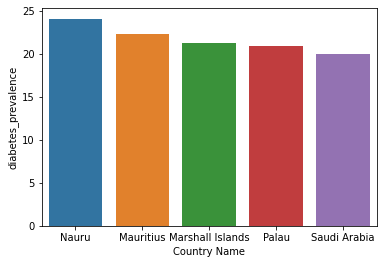

In [ ]:
sorted_by_diabetic_rate = obese_and_diabetic_rates.sort_values(by = "diabetes_prevalence", ascending= False)
ax = sns.barplot(x = "Country Name", y = "diabetes_prevalence", data = sorted_by_diabetic_rate[0:5])


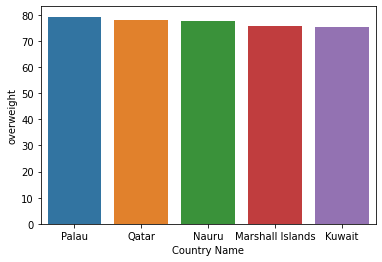

In [ ]:
sorted_by_obesity_rate = obese_and_diabetic_rates.sort_values(by = "overweight", ascending= False)
ax = sns.barplot(x = "Country Name", y = "overweight", data = sorted_by_obesity_rate[0:5])

2 of the top 5 overlap for overweight adults and diabetes. But what happens if we consider them with a correlational graph to just confirm our suspicions

In [ ]:
c1 = obese_and_diabetic_rates["overweight"]
c2 = obese_and_diabetic_rates["diabetes_prevalence"]
print(c1.corr(c2))

0.6034725880319263


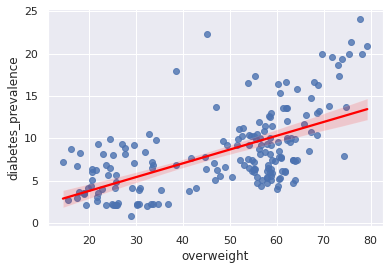

In [ ]:
sns.set(color_codes=True)
ax = sns.regplot(x="overweight", y="diabetes_prevalence", data=obese_and_diabetic_rates,line_kws={'color':'red'})

###2.2 Obesity + Diabetes + Sugar Content
Now, to take this a step further, let's pull in another dataset (the nutrition dataset)

In [ ]:
nutrition_data = pd.read_csv('/content/drive/MyDrive/jawns/openfoodfacts.tsv', sep = '\t', error_bad_lines=False)
nutrition_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,...,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,Organic polenta,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Oh no! we have other languages in here (which sux), so let's translate those. Also, commas? gross

In [ ]:
average_sugar_for_country = average_sugar_for_country.reset_index()
average_sugar_for_country_no_commas = average_sugar_for_country[~average_sugar_for_country["countries_en"].str.contains(",")]


In [ ]:
from googletrans import Translator

translator = Translator(service_urls=['translate.googleapis.com'])

countries_and_sugar = average_sugar_for_country_no_commas

countries_and_sugar["english_countries"] = countries_and_sugar["countries_en"].apply(lambda x : translator.translate(x).text)
countries_and_sugar

,countries_en,sugars_100g,english_countries
0,Albania,7.000000,Albania
4,Algeria,2.200000,Algeria
15,Andorra,8.923333,Andorra
18,Argentina,29.582500,Argentina
22,Aruba,8.000000,Aruba
...,...,...,...
590,السعودية,26.425000,Saudi Arabia
591,سلطنة-عمان,5.350000,Sultanate of Oman
592,ព្រះរាជាណាចក្រកម្ពុជា,1.340000,Kingdom of Cambodia
593,中华人民共和国,12.000000,People's Republic of China


In [ ]:
diabetes_and_sugar_clean = diabetes_and_sugar[["countries_en", "sugars_100g", "overweight", "diabetes_prevalence"]]
diabetes_and_sugar_clean

,countries_en,sugars_100g,overweight,diabetes_prevalence
0,Albania,7.000000,52.7,10.3
1,Algeria,2.200000,59.1,7.5
2,Andorra,8.923333,66.9,8.5
3,Argentina,29.582500,61.7,6.0
4,Australia,13.637814,64.0,5.1
...,...,...,...,...
64,Turkey,20.247647,66.3,12.8
65,Ukraine,20.000000,54.2,6.5
66,United Arab Emirates,30.900000,74.0,19.3
67,United Kingdom,14.742229,63.4,4.7


Now, the final correlation!!

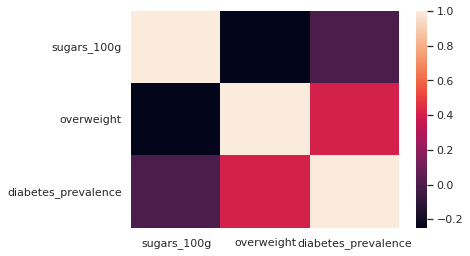

In [ ]:
ax = sns.heatmap(diabetes_and_sugar_clean.corr())

So, what we see here is that there is a much larger correlation between obesity and diabetes than there is between obesity and sugary foods. However, for some reason, the diabetes prevalence is weakly correlated to sugar content on average of food in each country

###2.3 STD rates over time

Secondly let's take a look at how the **Prevalence of syphilis (% of women attending antenatal care)** and **Incidence of HIV (% of uninfected population ages 15-49 that are newly infected with HIV)** have changed over time and see if they're correlated To do this we will plot the average Prevalence of  Syphilis and Incidence of HIV across all countries.  

In [ ]:
syphilis_df = raw_data_df[
                       (raw_data_df["Indicator Name"] == "Prevalence of syphilis (% of women attending antenatal care)")                    
                     ]
HIV_df = raw_data_df[(raw_data_df["Indicator Name"] == "Incidence of HIV (% of uninfected population ages 15-49)")]

  

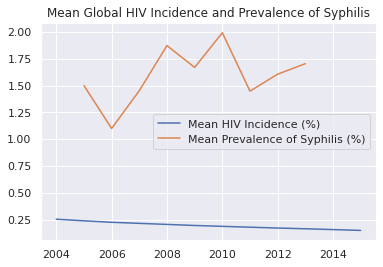

In [ ]:
#Want to plot Date on X, Disease occurance on Y, line for 
import matplotlib.pyplot as plt

x_axis = [2004 ,	2005 ,	2006 ,	2007 ,	2008 ,	2009 ,	2010 ,	2011 ,	2012 ,	2013 ,	2014 ,	2015]

#y axis will be a list 
syphilis_labels = []
HIV_labels = []

#compute average HIV incidence for every year 
#0 indicate missing
for i in range(2004, 2016):
  syph_to_push = syphilis_df[str(i)].mean()
  HIV_to_push = HIV_df[str(i)].mean()
  if syph_to_push != np.NaN :
    syphilis_labels.append(syph_to_push)
  else :
    syphilis_labels.append(np.NaN)
  if HIV_to_push != np.NaN :
    HIV_labels.append(HIV_to_push)
  else :
    HIV_labels.append(np.NaN)
  
# plot lines
plt.plot(x_axis, HIV_labels, label = "Mean HIV Incidence (%)")
plt.plot(x_axis, syphilis_labels, label = "Mean Prevalence of Syphilis (%)")
plt.title(label = 'Mean Global HIV Incidence and Prevalence of Syphilis')
plt.legend()
plt.show()


Now, as you can see, on our limited data, syphillis increased over time while HIV dropped. This likely stems from raised awareness of HIV and increased STD testing for Syphillis, but we can't be sure. That said, we'll include the end most recent data on Syphillis and HIV rates in our predictions for the modeling step of the project 

But before we do, let's do another correlation!

In [ ]:
print(pd.Series(HIV_labels).corr(pd.Series(syphilis_labels)))
d = {"HIV" : pd.Series(HIV_labels), "Syph" : pd.Series(syphilis_labels)}
HIV_syph = pd.DataFrame(data = d)

-0.4440847716996839


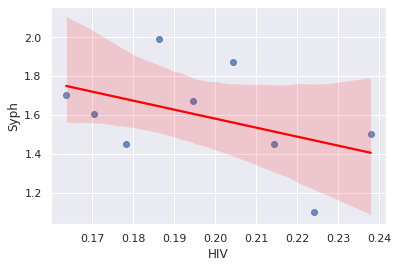

In [ ]:
sns.set(color_codes=True)
ax = sns.regplot(x="HIV", y="Syph", data=HIV_syph,line_kws={'color':'red'})

huh, now a negative correlation's a little weird. That kind of implies that as people stop getting AIDS they get more syphillis? Maybe we can explore this more later

###2.4 TB rates, detection, and Poverty Index

Now, for fun we pull in a UN dataset with poverty indices and correlate those with TB detection rates since we have easy access to that in the dataset

In [ ]:
raw_data_df_2 = pd.read_csv('/content/drive/MyDrive/jawns/un_data.csv', error_bad_lines=False)
raw_data_df_2 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2016,54.5,1.0
1,Afghanistan,2011,38.3,2.0
2,Afghanistan,2007,33.7,3.0
3,Albania,2012,14.3,4.0
4,Albania,2008,12.4,5.0
...,...,...,...,...
1157,185,Source: Living Conditions Monitoring Survey. P...,NaN,NaN
1158,186,Source: Mini-PICES 2019 (April/ May 2019) Pove...,NaN,NaN
1159,187,Source: Poverty Income and Consumption Expendi...,NaN,NaN
1160,188,Source: Poverty Income and Consumption Expendi...,NaN,NaN


Let's explore some more cool relations! Now, we're going to see if there is any correlation between the prevalence of TB and the detection rate in a country.

In [ ]:
tb_merged = pd.merge(prevalance_tb, detection_tb, how = 'inner', on = "Country Name")
tb_merged 

,Country Name,prevalance_tb,detection rate
0,East Asia & Pacific,193.0,66.0
1,East Asia & Pacific (excluding high income),209.0,65.0
2,Europe & Central Asia,48.0,81.0
3,Europe & Central Asia (excluding high income),82.0,80.0
4,High income,26.0,85.0
...,...,...,...
214,Vietnam,198.0,77.0
215,West Bank and Gaza,7.1,16.0
216,"Yemen, Rep.",63.0,77.0
217,Zambia,436.0,59.0


Below, we see that none of the top countries with prevalance of TB have the top detection rates, which is just kind of fun to see

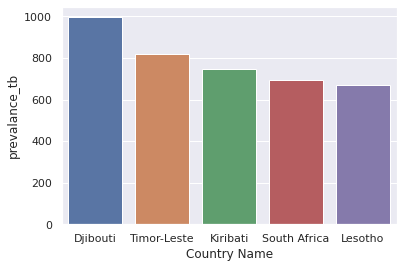

In [ ]:
tb_merged_sorted = tb_merged.sort_values(by = "prevalance_tb", ascending= False)
ax = sns.barplot(x = "Country Name", y = "prevalance_tb", data = tb_merged_sorted[0:5])


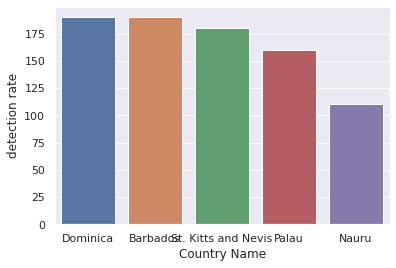

In [ ]:
tb_merged_sorted = tb_merged.sort_values(by = "detection rate", ascending= False)
ax = sns.barplot(x = "Country Name", y = "detection rate", data = tb_merged_sorted[0:5])

In [ ]:
c1 = tb_merged_sorted["detection rate"]
c2 = tb_merged_sorted["prevalance_tb"]

print(c2.corr(c1))

-0.3169891487239457


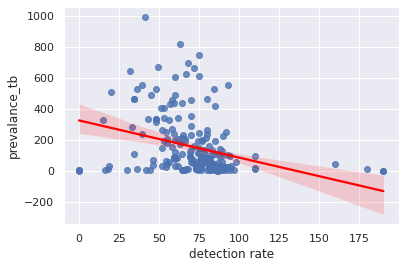

In [ ]:
tb_corr = tb_merged_sorted.corr()
sns.set(color_codes=True)
ax = sns.regplot(x="detection rate", y="prevalance_tb", data=tb_merged_sorted,line_kws={'color':'red'})

In fact, there's a negative correlation between detection rate and prevalence (maybe because if you can detect it easily, you can treat/prevent spread faster)

Now, let's link that to the poverty indices.

In [ ]:
tb_poverty = pd.merge(poverty_index, tb_merged_sorted, how = 'inner', on = "Country Name")
tb_poverty

,Country Name,Year,poverty index,prevalance_tb,detection rate
0,Afghanistan,2016,54.5,340.0,53.0
1,Albania,2012,14.3,26.0,75.0
2,Algeria,2011,5.5,118.0,74.0
3,Angola,2018,32.3,490.0,60.0
4,Argentina,2019,35.5,30.0,89.0
...,...,...,...,...,...
137,Vanuatu,2010,12.7,90.0,69.0
138,Vietnam,2018,6.7,198.0,77.0
139,West Bank and Gaza,2016,29.2,7.1,16.0
140,Zambia,2015,54.4,436.0,59.0


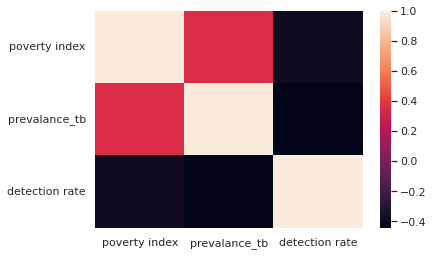

In [ ]:
tb_pov_no_year = tb_poverty.drop(axis = 1, columns = ["Year"])

tb_pov_no_year = tb_pov_no_year.astype({"poverty index" : "float"})

ax = sns.heatmap(tb_pov_no_year.corr())

We can see that there is a large negative correlation between TB detection rate and poverty index, as well as between TB detection rate and prevalance of TB, which makes a lot of sense. We can also see the positive correlation between prevalance of TB and poverty index.

Now let's build a Naive Bayes Classifier to predict whether country has an above or below average life expectency given the features and labels created prior. 

#3: Modeling!

In this section, we use Naives Bayes and a Random Forest Classifier to try and guess whether a country will have above average life expectancy or not from the factors mentioned earlier in this notebook (including some factors examined in our EDA)

###3.1 Naive Bayes
For Naive Bayes, we find that we can actually break a 90 percent accuracy rating for our predictions, which is pretty decent, but we think we can do better 

In [ ]:
from sklearn.model_selection import train_test_split

temp = train_test_split(features, labels, test_size=.299, train_size=.701, random_state=42)
x_train = temp[0]
x_test = temp[1]
y_train = temp[2]
y_test = temp[3]

In [ ]:
from sklearn.naive_bayes import GaussianNB

#initialize model
clf = GaussianNB()
#train model
clf.fit(x_train, y_train)
#make predictions
y_pred = clf.predict(x_test)

In [ ]:
naive_bayes_acc = clf.score(x_test, y_test)

In [ ]:
naive_bayes_acc

0.9008782936010038

###3.2 PCA

Here, we try to use PCA to see if we can combine/remove features for faster accurate predictions, but we actually see that we have no "knee". Our features are distinct enough that combining them wouldn't help us!

In [ ]:
from sklearn.model_selection import train_test_split

temp = train_test_split(features, labels, test_size=.2, train_size=.8, random_state=42)
x_train = temp[0]
x_test = temp[1]
y_train = temp[2]
y_test = temp[3]

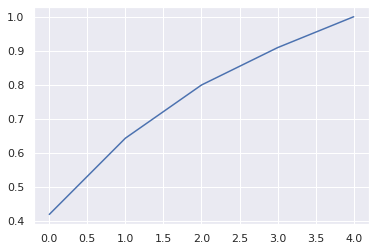

In [ ]:
# TO DO PCA
# scaling
# find num components to use
import sklearn.preprocessing 
import sklearn.decomposition
import numpy as np
scale = sklearn.preprocessing.StandardScaler()
fit_train = scale.fit_transform(x_train)
scaled_test = scale.transform(x_test)
# TO DO plot for explained variance
pca_model = sklearn.decomposition.PCA()
pca_model.fit(fit_train)
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))

And now, we see that we don't actually need PCA. Our 5 features are distinct/not correlated enough that PCA adds little benefit

###3.4 Random Forest
We end on a random forest classifier that crushes it with almost 98% accurate predictions!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(n_estimators = 100)
grid = GridSearchCV(rf, {'max_depth' : [5, 10, 15]})
rf_cv = grid.fit(x_train, y_train)

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 100, max_depth= 15)
rf2.fit(x_train, y_train)
predictions = rf2.predict(x_test)
test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(test_accuracy)

0.9793621013133208


#Linear Regression for Life Expectancy Prediction

In [ ]:
features_lin_reg = combined_data_set_2[['Adolescent fertility rate (births per 1,000 women ages 15-19)',
                                'Out-of-pocket health expenditure (% of total expenditure on health)',
                                'People practicing open defecation (% of population)',
                                'Prevalence of undernourishment (% of population)',
                         'Unemployment, total (% of total labor force)']]
labels_lin_reg = combined_data_set_2["Life expectancy at birth, total (years)"]

In [ ]:
from sklearn.model_selection import train_test_split

temp = train_test_split(features_lin_reg, labels_lin_reg, test_size=.299, train_size=.701, random_state=42)
x_train = temp[0]
x_test = temp[1]
y_train = temp[2]
y_test = temp[3]

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg = linReg.fit(x_train, y_train)
score = linReg.score(x_test, y_test)
score

0.7010796991773267

#4. Challenges and Obstacles

oooooof we had a lot of these. For starters, this wasn't going to be our project. We wanted to use the food dataset, but then the google translate API was too slow, and we couldn't translate all the rows in time (even when we got creative and hashed all the unique words to their translations since there were 100k unique words). So, we ended up pivoting to this. Then, we hit this issue where our dataset was based off of countries, but those are hardly "big data" in quantity, so we decided to consider each country in each year as its own individual country. So, USA 2020 != USA 2021. But, to deal with that transformation we had to cleverly translate the dataset we had as it started with the years being columns. The solution to that (the two functions above) actually came to Jake in a dream he had about the project.

Aside from issues with cleaning, we had some trouble getting a good grasp on how we'd model the data since we wanted to actually predict life expectency, but we didn't have a large enough dataset for that to be accurate, so we instead went for classifying it in above and below average (similar in approach to the polyweights algorithm "experts environment"). We did end up predicting with linear regression, but as I said, the low data lead to only 70% accuracy (above expected to be fair)

#5. Future steps

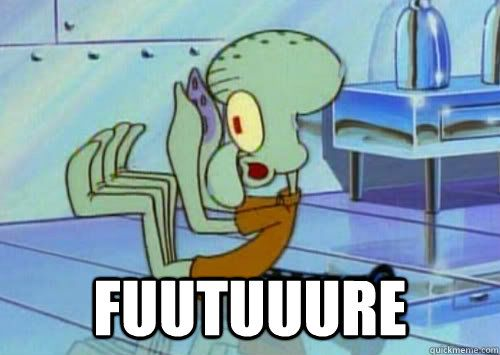

In the future, we'd seek to find more datasets we could merge this with to get more features, find more correlations, and thus better predictions. Also, using a regression to more accurately predict a number value instead of a classification for the life expectency would be sick